In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
df.shape

(16468, 14)

This dataset contains 16,468 records and 14 features.

As, per my observation 'Unnamed: 0' is not useful for predicting target variable. Let's drop this feature.

In [6]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.shape

(16468, 13)

Now after dropping one feature, dataset contains 13 features.

Let's check for null values in the dataset.

In [7]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

This dataset contains 14,951 records with null values. Lets drop those records

In [8]:
df.type.value_counts()

conventional    1517
Name: type, dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)
df.shape

(1517, 13)

After dropping records with null values dataset contains 1517 records and 13 features.

Let's check the information about the features of the Avocado data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


Let's check statistical informtion of the data.

In [11]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


From the above information, it is not clear to understand the statistical information of the data.

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [13]:
df.duplicated().sum()

0

Duplicates are not present in this dataset.

Let's divide 'Date' feature into seperate columns for date,month,year.

In [14]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df.drop('Date',axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,29,11


'Type', 'Region' features are of categorical features. Let's encode these features with encoding techniques.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [17]:
df['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [18]:
LE=LabelEncoder()
df['region']=LE.fit_transform(df['region'])
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [19]:
df['type'].unique()

array(['conventional'], dtype=object)

In [20]:
df['type']=LE.fit_transform(df['type'])
df['type'].unique()

array([0])

We have encoded categorical features 'type','region' using LabelEncoder. 

Let's understand how the data is distributed with the help of plotting techniques.

In [21]:
df.shape

(1517, 14)

In [22]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Day', 'Month'],
      dtype='object')

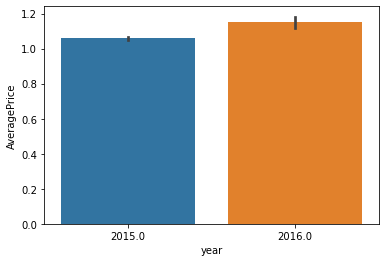

In [23]:
sns.barplot(x='year',y='AveragePrice',data=df)
plt.show()

From the above graph we can observe Avocado price is higher in 2016 than 2015.

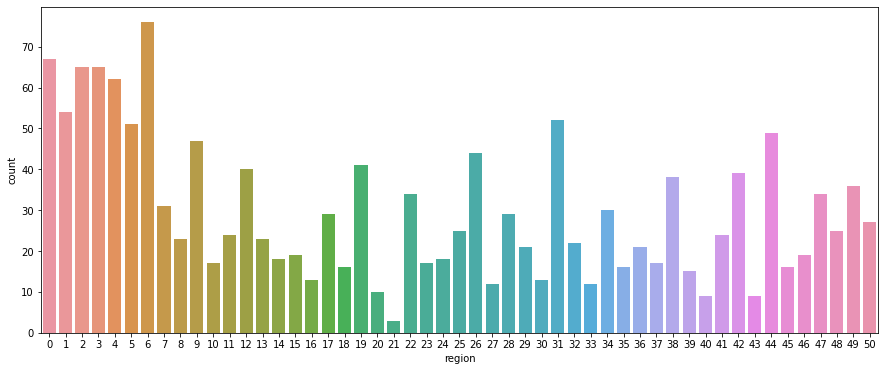

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['region'])
plt.show()

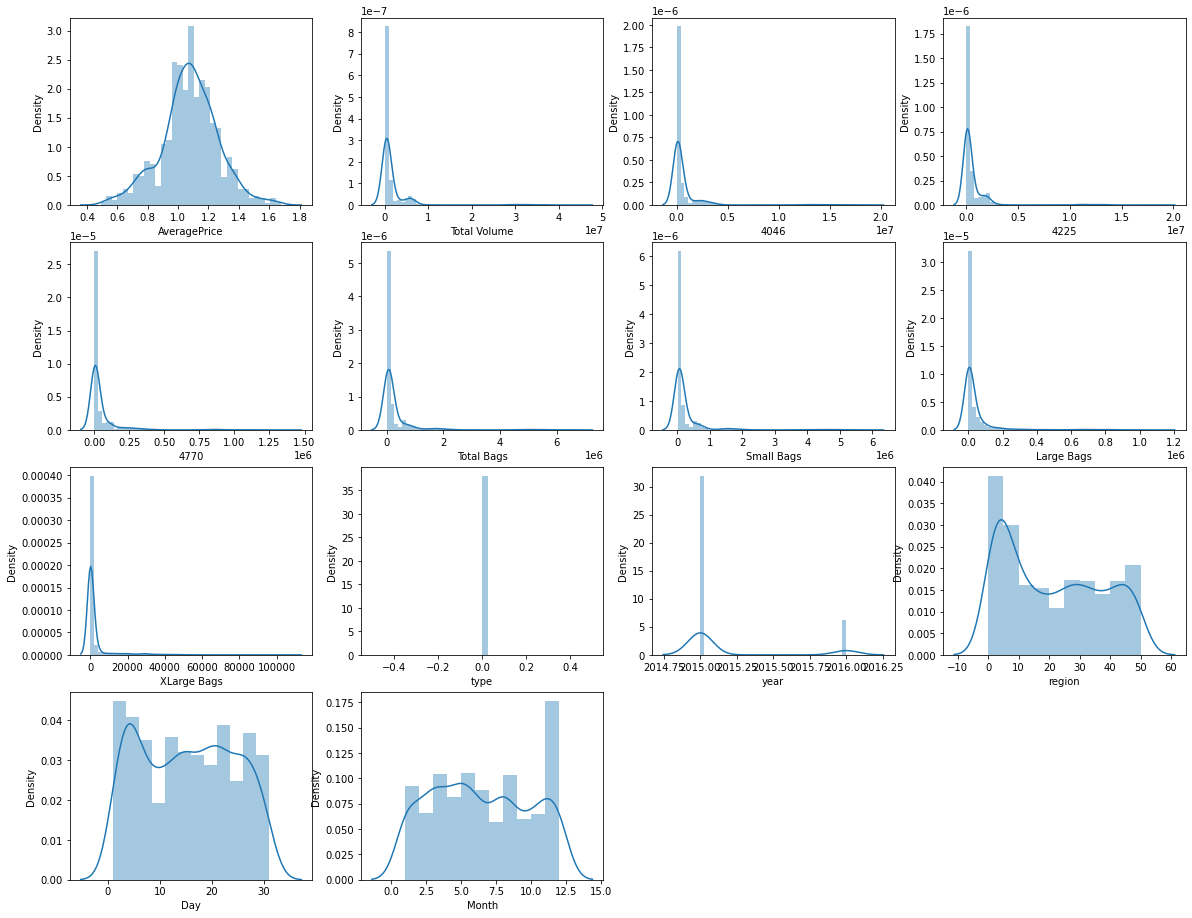

In [25]:
n=1
cols=['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region','Day','Month']
plt.figure(figsize=(20,20))
for i in cols:
    ax=plt.subplot(5,4,n)
    sns.distplot(x=df[i])
    plt.xlabel(i)
    n+=1
    
plt.show()    

From the above graph, we can observe skeweness in features, 'Total volume','4046','4225','4770','Total Bags','small bags','Large Bags',
'XLarge Bags','year'.

Let's check skeweness values for these features

In [26]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
Day             0.041303
Month           0.101439
dtype: float64

From the above we can observe skeweness value for features 'Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year'.

In [27]:
from scipy.stats import boxcox
df['Total Volume']=boxcox(df['Total Volume'])[0]
df['4046']=boxcox(df['4046'])[0]
df['4225']=boxcox(df['4225'])[0]
df['4770']=np.cbrt(df['4770'])
df['Total Bags']=boxcox(df['Total Bags'])[0]
df['Small Bags']=boxcox(df['Small Bags'])[0]
df['Large Bags']=np.cbrt(df['Large Bags'])
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])
df.skew()

AveragePrice   -0.109444
Total Volume    0.071157
4046           -0.012074
4225            0.008443
4770            1.526943
Total Bags      0.005197
Small Bags      0.027623
Large Bags      1.431704
XLarge Bags     2.000670
type            0.000000
year            1.828332
region          0.288146
Day             0.041303
Month           0.101439
dtype: float64

In [28]:
df['4770']=np.cbrt(df['4770'])
df['Large Bags']=np.sqrt(df['Large Bags'])
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])
df.skew()

AveragePrice   -0.109444
Total Volume    0.071157
4046           -0.012074
4225            0.008443
4770            0.210989
Total Bags      0.005197
Small Bags      0.027623
Large Bags     -0.008198
XLarge Bags     0.524549
type            0.000000
year            1.828332
region          0.288146
Day             0.041303
Month           0.101439
dtype: float64

By using transformation techniques, skeweness is reduced.

Let's check for outliers in the dataset.

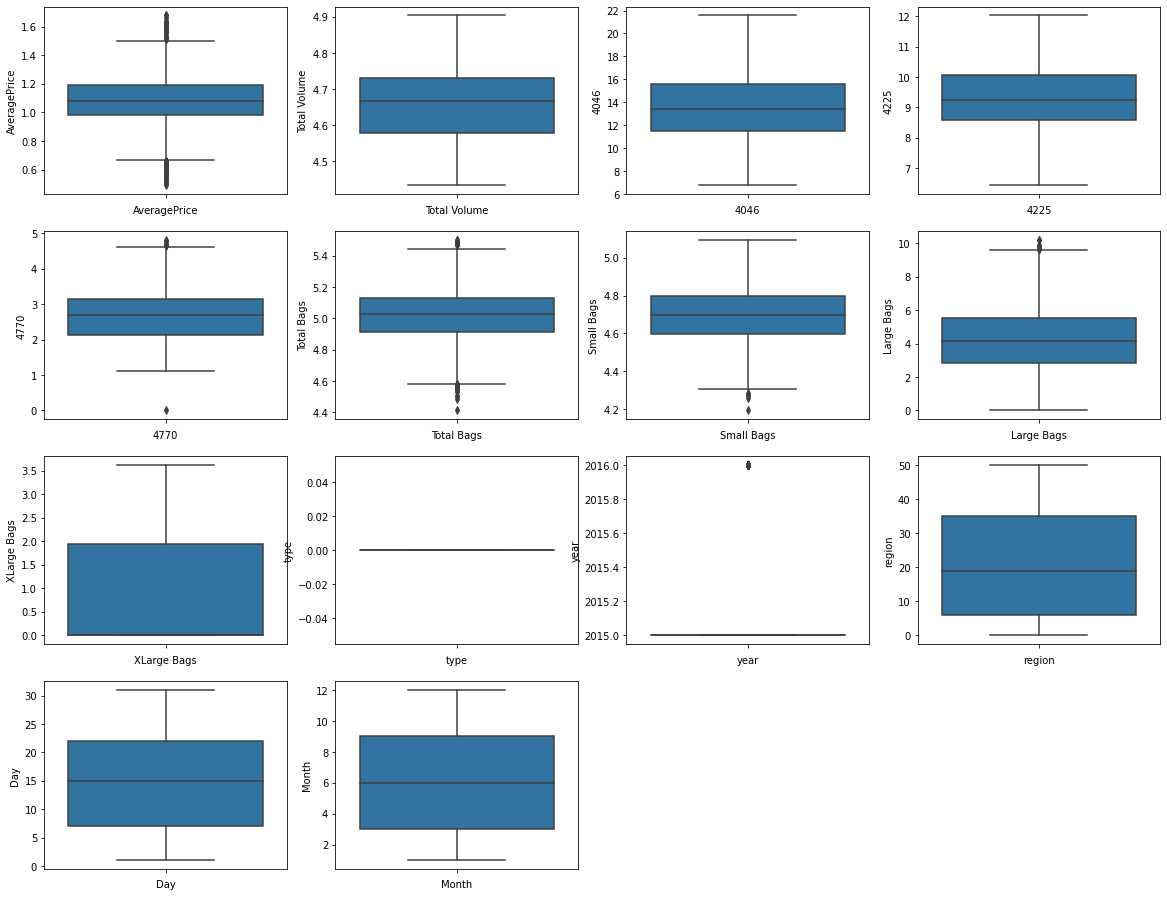

In [29]:
n=1
cols=['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region','Day','Month']
plt.figure(figsize=(20,20))
for i in cols:
    ax=plt.subplot(5,4,n)
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    n+=1
    
plt.show()    

From the above we can observe outliers are present in the dataset. Let's use zscore technique to remove outliers.

In [30]:
from scipy.stats import zscore
zscore=np.abs(zscore(df[['AveragePrice', '4770',
       'Total Bags', 'Small Bags','Large Bags']]))
df1=df[(zscore<3).all(axis=1)]
df1.shape

(1511, 14)

We have removed outliers from the dataset.

Now, let's check the correlation among the features and label.

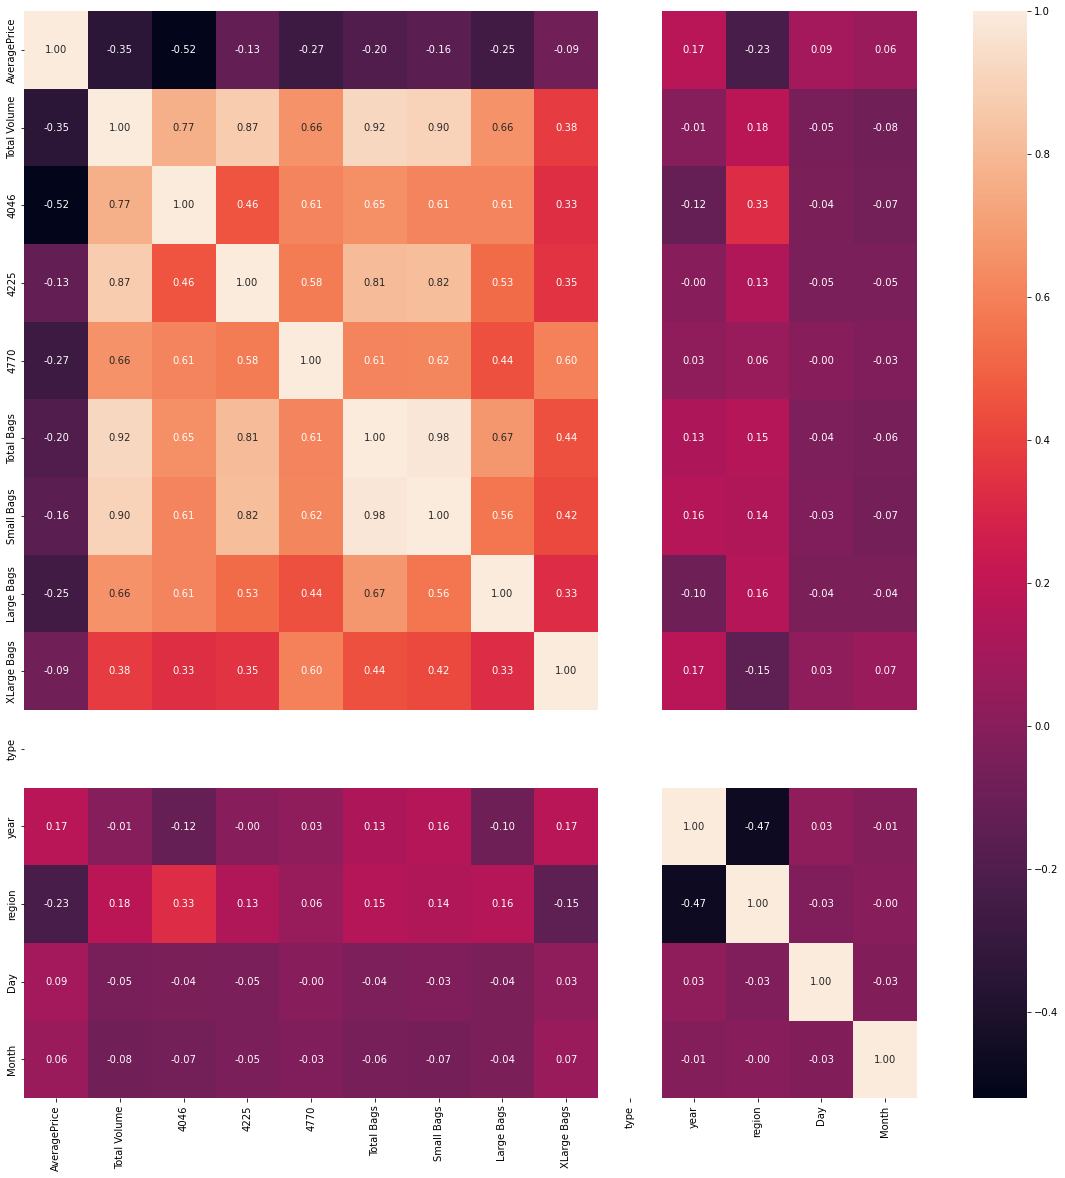

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

From the above heatmap, we can observe 'type' feature is highly correlated with all the features. Let's drop this fearure.

In [32]:
df1.drop(columns='type',axis=1,inplace=True)

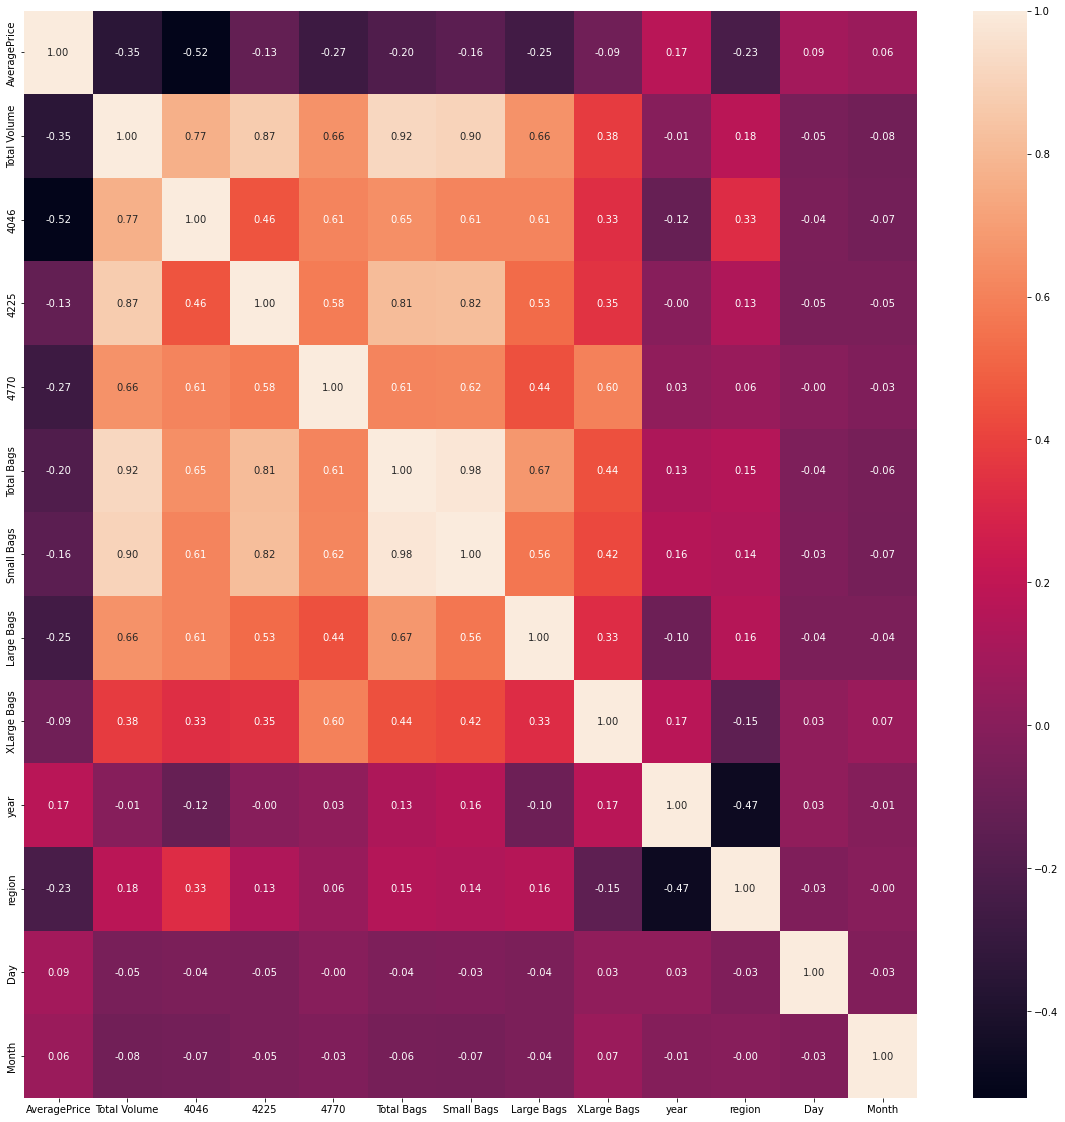

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

As per my analysis from heatmap, 'total bags','small bags' features are higly correlated with each other.

Let's check for the Multi collieanrity problem in the data.

TASK - 1 : CLASSIFICATION PROBELM
FINDING "REGION"

In [34]:
from sklearn.preprocessing import StandardScaler
x=df1.drop(columns='region',axis=1)
y=df1['region']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [36]:
VIF=pd.DataFrame()
VIF['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x.shape[1])]
VIF['features']=x.columns
VIF

,vif,features
0,1.584606,AveragePrice
1,25.928859,Total Volume
2,5.978876,4046
3,8.596194,4225
4,2.809992,4770
5,67.436113,Total Bags
6,54.132735,Small Bags
7,3.742863,Large Bags
8,1.839372,XLarge Bags
9,1.263161,year


As, per my analysis from heatmap and VIF value, 'total bags','small bags' are correlated with each other. 

Let's drop 'small bags' feature since its correlation value for predicting target is less than 'total bags' feature.

In [37]:
df1.drop(['Small Bags','Total Volume'],axis=1,inplace=True)
x.drop(['Small Bags','Total Volume'],axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)

In [38]:
VIF=pd.DataFrame()
VIF['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x.shape[1])]
VIF['features']=x.columns
VIF

,vif,features
0,1.457723,AveragePrice
1,3.164036,4046
2,3.562925,4225
3,2.638264,4770
4,5.588324,Total Bags
5,2.116489,Large Bags
6,1.712868,XLarge Bags
7,1.252471,year
8,1.016163,Day
9,1.021970,Month


In [39]:
y.value_counts()

6     74
0     67
2     65
3     63
4     62
1     54
31    51
5     50
44    49
9     47
26    44
19    41
12    40
42    39
38    38
49    36
47    34
22    34
7     31
34    30
17    29
28    29
50    27
25    25
48    25
11    24
41    24
8     23
13    23
32    22
29    21
36    21
46    19
15    19
24    18
14    18
10    17
23    17
37    17
35    16
45    16
18    16
39    15
16    13
30    13
33    12
27    12
20    10
40     9
43     9
21     3
Name: region, dtype: int64

In [188]:
y=df1['region']
y.value_counts()

1    553
5    278
2    233
4    231
3    216
Name: region, dtype: int64

Let's find the best RandomState

TASK-1 Classification Problem

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [41]:
max_acc=0
max_rand_state=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_predict=RFC.predict(x_test)
    acc_score=accuracy_score(y_test,y_predict)
    if(acc_score>max_acc):
        max_acc=acc_score
        max_rand_state=i
        
print("Best Random State - ",max_rand_state," Accuracy score - ",max_acc)        

Best Random State -  56  Accuracy score -  0.986784140969163


Best Random State is 56 and Accuracy score is 99%

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=56)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC

In [44]:
svc=SVC()
svc.fit(x_train,y_train)
y_predict_svc=svc.predict(x_test)
acc_score_svc=accuracy_score(y_test,y_predict_svc)
print("Accuracy score ",acc_score_svc)

Accuracy score  0.8678414096916299


In [45]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_predict_DTC=DTC.predict(x_test)
acc_score_DTC=accuracy_score(y_test,y_predict_DTC)
print("Accuracy Score ",acc_score_DTC)

Accuracy Score  0.9074889867841409


In [46]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_predict_Knn=Knn.predict(x_test)
acc_score_Knn=accuracy_score(y_test,y_predict_Knn)
print("Accuracy Score ",acc_score_Knn)

Accuracy Score  0.788546255506608


In [47]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_predict_ABC=ABC.predict(x_test)
acc_score_ABC=accuracy_score(y_test,y_predict_ABC)
print("Accuracy Score ",acc_score_ABC)

Accuracy Score  0.10572687224669604


In [48]:
GDT=GradientBoostingClassifier()
GDT.fit(x_train,y_train)
y_predict_GDT=GDT.predict(x_test)
acc_score_GDT=accuracy_score(y_test,y_predict_GDT)
print("Accuracy Score ",acc_score_GDT)

Accuracy Score  0.8832599118942731


In [49]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
y_predict_BC=BC.predict(x_test)
acc_score_BC=accuracy_score(y_test,y_predict_BC)
print('Accuracy Score ',acc_score_BC)

Accuracy Score  0.9515418502202643


In [50]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict_RFC=RFC.predict(x_test)
acc_score_RFC=accuracy_score(y_test,y_predict_RFC)
print("accuracy score :",acc_score_RFC)

accuracy score : 0.9845814977973568


In [51]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_predict_ETC=ETC.predict(x_test)
acc_score_ETC=accuracy_score(y_test,y_predict_ETC)
print("Accuracy Score ",acc_score_ETC)

Accuracy Score  0.973568281938326


From the above we can observe RandomForestClassifier exhibits highest accuracy score of 98.4%. 

Let's check whether accuracy score provided by the model is due to overfitting of the model. 

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
score=cross_val_score(RFC,x,y)
mean=score.mean()
print("Difference is ",acc_score_RFC-mean)

Difference is  0.04608347580972749


In [54]:
score=cross_val_score(svc,x,y)
mean=score.mean()
print("Difference is ",acc_score_svc-mean)

Difference is  0.8188653862614723


In [55]:
score=cross_val_score(Knn,x,y)
mean=score.mean()
print("Difference is ",acc_score_Knn-mean)

Difference is  0.47483786479998763


In [56]:
score=cross_val_score(DTC,x,y)
mean=score.mean()
print("Difference is ",acc_score_DTC-mean)

Difference is  0.08880824453773084


In [57]:
score=cross_val_score(ETC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ETC-mean)

Difference is  0.021831783785199455


In [58]:
score=cross_val_score(GDT,x,y)
mean=score.mean()
print("Difference is ",acc_score_GDT-mean)

Difference is  0.052625855111111286


In [59]:
score=cross_val_score(ABC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ABC-mean)

Difference is  -0.02134020532198798


In [60]:
score=cross_val_score(BC,x,y)
mean=score.mean()
print("Difference is ",acc_score_BC-mean)

Difference is  0.07261150685480189


From the above we can observe ExtraTreesClassifier has less value. Let's consider this model as the best model for the dataset.

Let's generate classification report and confusion matrix

In [61]:
print('confusion matrix \n',confusion_matrix(y_test,y_predict_ETC))
print('classification report \n',classification_report(y_test,y_predict_ETC))

confusion matrix 
 [[22  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0 10]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        10
           9       0.92      1.00      0.96        11
          10       1.00      1.00      1.00         6
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00 

Let's tune the paramters and try to increase the accuracy score of the model

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param={'criterion':['gini','entropy'],
      'max_depth':[17,18,19,20,21,22],
      'min_samples_leaf':[2,3,4],
      'min_samples_split':[6,7,8]}
GSV=GridSearchCV(ETC,param_grid=param,n_jobs=-1)
GSV.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [17, 18, 19, 20, 21, 22],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [6, 7, 8]})

In [64]:
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 21,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [71]:
Best_model=ExtraTreesClassifier(criterion='gini',max_depth=19,min_samples_leaf=2,min_samples_split=5)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
acc=accuracy_score(y_test,y_predict)
print("Accuracy score - ",acc)

Accuracy score -  0.9779735682819384


In [72]:
print("confusion_matrix\n",confusion_matrix(y_test,y_predict))

confusion_matrix
 [[22  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0 10]]


In [73]:
print("classification report \n",classification_report(y_test,y_predict))

classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      0.83      0.91         6
   

In [74]:
import pickle
pickle.dump('Best_model',open("Avocado_classification","wb"))

TASK-2 Regression problem

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [76]:
x=df1.drop(columns='AveragePrice',axis=1)
y=df1['AveragePrice']
x_scaled=scaler.fit_transform(x)

In [77]:
VIF=pd.DataFrame()
VIF['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x.shape[1])]
VIF['features']=x.columns
VIF

,vif,features
0,2.728127,4046
1,3.564503,4225
2,2.650233,4770
3,5.618826,Total Bags
4,2.141155,Large Bags
5,1.765239,XLarge Bags
6,1.542683,year
7,1.535854,region
8,1.008537,Day
9,1.022653,Month


Let's find best Random State

In [78]:
max_rvalue=0
max_randstate=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    y_predict=LR.predict(x_test)
    r_value=r2_score(y_test,y_predict)
    if(r_value>max_rvalue):
        max_rvalue=r_value
        max_randstate=i
        
    
print('Best random state : ',max_randstate) 
print('r2 score :',max_rvalue)

Best random state :  79
r2 score : 0.3896376462277227


Best Random State is 79 and R2score is 39%.

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=79)

In [80]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

In [81]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
r_value_LR=r2_score(y_test,y_predict_LR)
print("R2 score ",r_value_LR)

R2 score  0.3896376462277227


In [82]:
L=Lasso()
L.fit(x_train,y_train)
y_predict_L=L.predict(x_test)
r_value_L=r2_score(y_test,y_predict_L)
print("R2 score ",r_value_L)

R2 score  -0.0003748096990663363


In [83]:
R=Ridge()
R.fit(x_train,y_train)
y_predict_R=R.predict(x_test)
r_value_R=r2_score(y_test,y_predict_R)
print('R2 score ',r_value_R)

R2 score  0.38948024605143095


In [84]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_predict_DTR=DTR.predict(x_test)
r_value_DTR=r2_score(y_test,y_predict_DTR)
print('R2 score ',r_value_DTR)

R2 score  0.7193933448073371


In [85]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
y_predict_KNR=KNR.predict(x_test)
r_value_KNR=r2_score(y_test,y_predict_KNR)
print('R2 score  ',r_value_KNR)

R2 score   0.690775980610026


In [86]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
y_predict_RFR=RFR.predict(x_test)
r_value_RFR=r2_score(y_test,y_predict_RFR)
print('R2 score ',r_value_RFR)

R2 score  0.8317570665916472


In [87]:
ETR=ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_predict_ETR=ETR.predict(x_test)
r_value_ETR=r2_score(y_test,y_predict_ETR)
print('R2 score ',r_value_ETR)

R2 score  0.6858753789975858


From the above we can observe R2 score provided by RandomForestRegressor is highest among the other models. 

Now, let's check R2 score provided by the models are due to overfitting or not.

This can be checked with cross validation score value.

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
score=cross_val_score(LR,x,y)
print("cross validation score is ", r_value_LR-score.mean())

cross validation score is  0.4714669696116547


In [90]:
score=cross_val_score(DTR,x,y)
print("Difference is ",r_value_DTR-score.mean())

Difference is  1.0862523012017626


In [91]:
score=cross_val_score(KNR,x,y)
print("Difference is ",r_value_KNR-score.mean())

Difference is  1.0636526179178762


In [92]:
score=cross_val_score(L,x,y)
print("Difference is ",r_value_L-score.mean())

Difference is  0.03339702371686633


In [93]:
score=cross_val_score(R,x,y)
print("Difference is ",r_value_R-score.mean())

Difference is  0.462324061044673


In [94]:
score=cross_val_score(RFR,x,y)
print("Difference is ",r_value_RFR-score.mean())

Difference is  0.6571847541947325


In [95]:
score=cross_val_score(ETR,x,y)
print("Difference is ",r_value_ETR-score.mean())

Difference is  1.3195393237847097


As per my observation from R2 score and cross validation score, RandomForestRegressor is best model for this dataset.

Let's tune the parameters.

In [96]:
from sklearn.model_selection import GridSearchCV

In [98]:
param={'max_depth':[17,18,19,20,21,22],
      'min_samples_leaf':[2,3,4],
      'min_samples_split':[6,7,8]}
GSV=GridSearchCV(RFR,param_grid=param,n_jobs=-1)
GSV.fit(x_train,y_train)
GSV.best_params_

{'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 7}

In [104]:
Best_model=RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
r_value=r2_score(y_test,y_predict)
print("R2 score : ",r_value)

R2 score :  0.8178232675009345


After tuning parameters R2 score is not increased. Let's consider default parameters only.

Let's generate Mean Absolute Error, Mean Squared Error.

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error ",mean_absolute_error(y_test,y_predict_RFR))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict_RFR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,y_predict_RFR)))

Mean Absolute Error  0.054482275132275076
Mean Squared Error  0.005599780185185181
Root mean squared error  0.07483167902155598


In [106]:
import pickle
pickle.dump('RFR',open("Avocado_Regression","wb"))